In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import os

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-16 21:11,01-01-16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-16 1:25,01-02-16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-16 20:25,01-02-16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-16 17:31,01-05-16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-16 14:42,01-06-16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
print(df.shape)

(1156, 7)


In [5]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

# Chacking for null values

In [6]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
# deleting rows which containes null valuues

In [9]:
df.drop(df[df['END_DATE*'].isna()].index,axis=0, inplace=True)

In [10]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 45.1+ KB


In [12]:
# dropping 'purpose' column because it contains many numbers of mising values. and no needed for further analysis

In [13]:
df.drop(['PURPOSE*'], axis=1, inplace=True)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,01-01-16 21:11,01-01-16 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,01-02-16 1:25,01-02-16 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,01-02-16 20:25,01-02-16 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,01-05-16 17:31,01-05-16 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,01-06-16 14:42,01-06-16 15:49,Business,Fort Pierce,West Palm Beach,63.7


# Checking for Duplicate Rows

In [14]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [15]:
df.drop(df[df.duplicated()].index,axis=0, inplace=True)

In [16]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


# convrting start_date column into datetime type

In [17]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],)

In [18]:
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'],)


In [19]:
df.dtypes
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7
...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4


# EDA

1. Category

In [20]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [21]:
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*', sum))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


<Figure size 432x288 with 0 Axes>

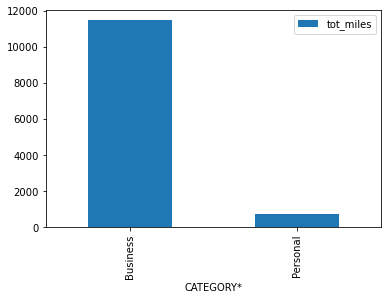

In [22]:
plt.figure()
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*', sum)).plot(kind='bar')

2. Start

In [23]:
len(df['START*'].unique())

177

**there are total 117 unique starting points**

In [24]:
df['START*'].value_counts(ascending=False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

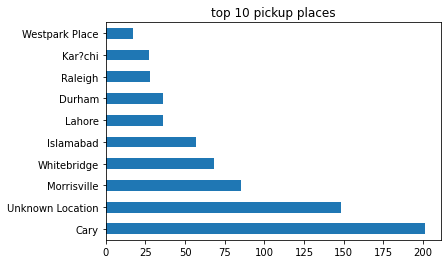

In [25]:
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',title='top 10 pickup places')

In [26]:
df[df['START*']== 'Unknown Location']['START*'].value_counts()

Unknown Location    148
Name: START*, dtype: int64

In [27]:
df[df['STOP*']== 'Unknown Location']['STOP*'].value_counts()

Unknown Location    149
Name: STOP*, dtype: int64

3. Miles

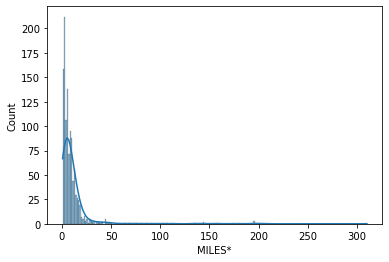

In [31]:
sns.histplot(df['MILES*'],kde=True)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


# Multivariable Analysis

In [34]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [35]:
df.groupby(['START*', 'STOP*',])['MILES*'].apply(print)

910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

Name: (Oakland, Berkeley), dtype: float64
435    13.2
830    13.0
Name: (Oakland, Emeryville), dtype: float64
834    9.5
965    9.7
Name: (Oakland, San Francisco), dtype: float64
438    5.2
Name: (Oakland, Unknown Location), dtype: float64
377    11.2
Name: (Old City, Hog Island), dtype: float64
376    2.9
Name: (Old City, Parkway Museums), dtype: float64
275     6.6
278     7.3
281    25.7
285    13.8
286    28.8
288    16.4
291    20.3
Name: (Orlando, Kissimmee), dtype: float64
277    6.9
Name: (Orlando, Orlando), dtype: float64
938    2.5
Name: (Palo Alto, Menlo Park), dtype: float64
363    9.8
Name: (Palo Alto, Sunnyvale), dtype: float64
347    3.1
433    2.8
598    1.7
859    8.7
861    2.1
Name: (Parkway, Whitebridge), dtype: float64
514    1.2
Name: (Parkwood, Parkwood), dtype: float64
528    7.0
Name: (Pontchartrain Beach, CBD), dtype: float64
470    1.7
475    4.8
Name: (Pontchartrain Shores, Pontchartrain Shores), dtype: float64
250    7.5
Name: (Port Bolivar, Galveston), dty

START*         STOP*             
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES*, Length: 363, dtype: object

In [37]:
df.groupby(['START*', 'STOP*',])['MILES*'].sum().sort_values(ascending = False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

# **Checking for round trip**

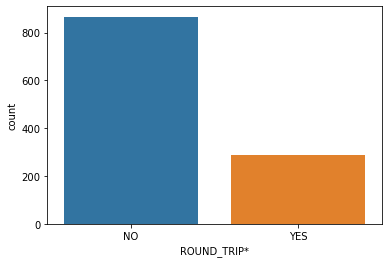

In [43]:
def is_round(df):
    if df['START*'] == df['STOP*']:
        return 'YES'
    else:
        return 'NO'

df['ROUND_TRIP*'] = df.apply(is_round, axis=1)
sns.countplot(x='ROUND_TRIP*', data=df, order=df['ROUND_TRIP*'].value_counts().index)

In [44]:
df['ROUND_TRIP*'].value_counts()

NO     866
YES    288
Name: ROUND_TRIP*, dtype: int64